<a href="https://colab.research.google.com/github/rizalkl/Python_codes/blob/main/Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [382]:
### Install and load Packages
%%capture
!pip install plotnine 
!pip install dfply
!pip install fitter

In [383]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from plotnine import *
from dfply import *
from numpy.core.numeric import full
import random
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy

In [ ]:
### Load in the dataset
df = pd.read_excel("/content/salesData.xlsx", sheet_name= 'Data', header=0)
prodtype = pd.read_excel("/content/salesData.xlsx", sheet_name= 'Sheet2', header=2)
prodtype = prodtype.drop(prodtype.columns[[0, 1]], axis=1)
prodtype.columns = prodtype.iloc[0]
full_df = pd.merge(df,prodtype, how='left', left_on = 'Product Type', right_on='Product_type')
full_df

,Month,Region,Time (minutes),Product Type,Quantity,Product_type,Revenue,Capacity
0,1,EastCoast,44.975953,1,1,1,10,6000
1,1,WestCoast,56.199493,5,4,5,10,3000
2,1,WestCoast,63.320189,4,4,4,9,3000
3,1,EastCoast,42.824992,3,2,3,15,4500
4,1,EastCoast,56.760768,1,2,1,10,6000
...,...,...,...,...,...,...,...,...
6167,6,WestCoast,42.415861,1,3,1,10,6000
6168,6,WestCoast,62.400873,4,4,4,9,3000
6169,6,EastCoast,45.969820,1,1,1,10,6000
6170,6,EastCoast,43.542181,1,2,1,10,6000


In [ ]:
region_qty = df[['Region', 'Quantity', 'Product Type']].groupby(['Region', 'Product Type']).sum().reset_index()
region_qty

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


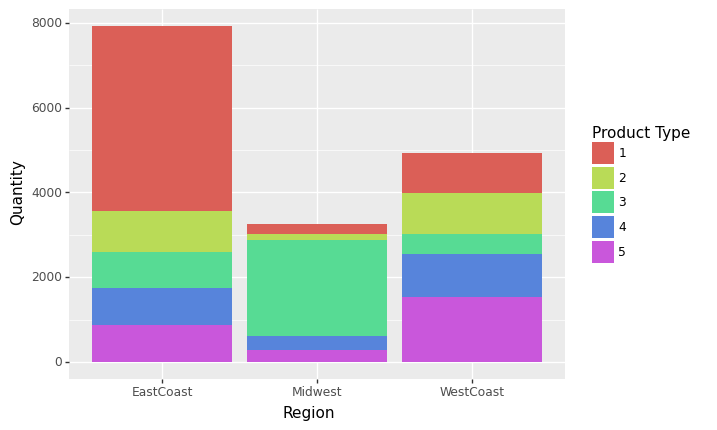

<ggplot: (8747200543885)>

In [ ]:
## Plot of Region by Quantity, filled by product type. This chart shows that EastCoast has the highest quantity, and the most prevalent product is 1.
## Midwest's most prevalent product is product 3. 
## WestCoast's prevalent product is 5. 
(ggplot(full_df, aes('Region', 'Quantity', fill='Product Type'))
 + geom_col())

In [ ]:
monthqty = df[['Month', 'Quantity', 'Region']].groupby(['Month','Region']).sum().reset_index()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


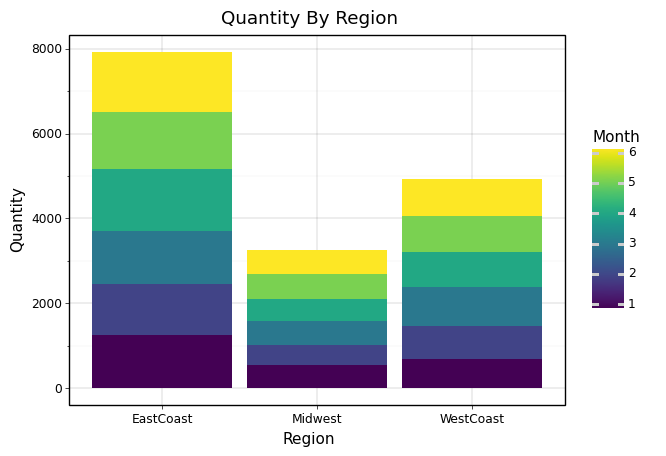

<ggplot: (8747197098197)>

In [ ]:
## this chart shows that there's not really any varying quantity purchases given a different month. 
(ggplot(monthqty, aes('Region', 'Quantity', fill='Month'))
 + geom_col() +
 theme_linedraw() +
 ggtitle("Quantity By Region"))

Text(0.5, 1.0, 'Histogram of Quantity')

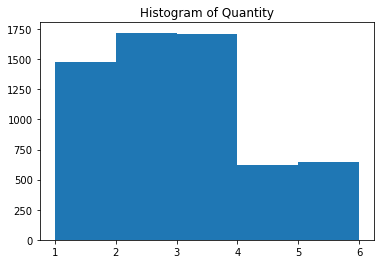

In [ ]:
## Histogram of Quantity to check for frequenccies and occurences. 
plt.hist(full_df['Quantity'], bins=[1,2,3,4,5,6])
plt.title("Histogram of Quantity")

<BarContainer object of 6172 artists>

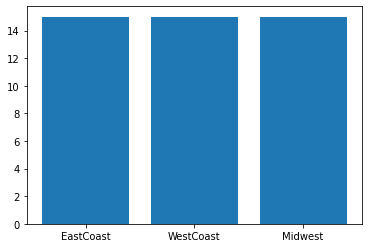

In [ ]:
### Bar graph of Regions by revenue
plt.bar(full_df['Region'],full_df['Revenue'])

Text(0.5, 1.0, 'Histogram of Time(Mins)')

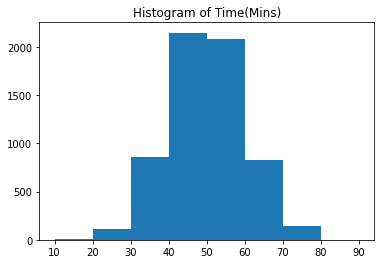

In [ ]:
plt.hist(full_df['Time (minutes)'], bins = [10,20,30,40,50,60,70,80,90])
plt.title("Histogram of Time(Mins)")

Text(0.5, 1.0, 'Product counts by type')

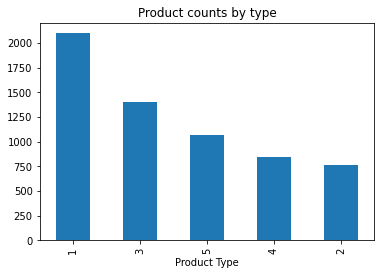

In [ ]:
### Plot of count of product types. 
full_df.value_counts('Product Type').plot(kind='bar')
plt.title("Product counts by type")

,sumsquare_error,aic,bic,kl_div
lognorm,0.000324,1064.995187,-103434.140355,inf
gamma,0.000324,1064.418506,-103429.693693,inf
beta,0.000325,1081.173720,-103412.745891,inf
norm,0.000334,1057.800971,-103259.382427,inf
burr,0.000607,1032.520640,-99545.823843,inf


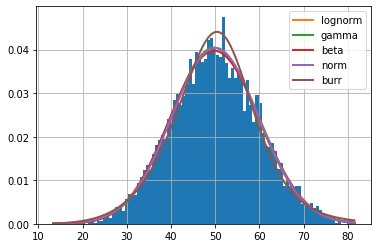

In [ ]:
### Checking for distribution of time variable. The plot shows tthat the distribution is fairly normal. 
from fitter import Fitter, get_common_distributions, get_distributions
height = full_df['Time (minutes)'].values
f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "uniform"])
f.fit()
f.summary()

In [359]:
## Q2 without any marketing efforts. 
from numpy.lib.function_base import average
import random as rd
time_mean=50
time_sd=9.875
quanity_mean=2.608
quanity_sd=1.369
Customer=int(input('Input the number of people you wish to simulate: '))
time_lst=list()
Region_lst= list()
product_lst=list()
quanity_lst=list()
for i in range (1, Customer+1):
  if i == 1:
     time = rd.normalvariate(time_mean, time_sd)
     quanity=rd.normalvariate(quanity_mean,quanity_sd)
     value=rd.random()
     Product_value=rd.random()
     time_lst.append(time)
     quanity_lst.append(quanity)
     #print('the  time customer might spend on Website is ', time, 'minutes')
     if (value < .33):
       region=1
       Region_lst.append(region)
       #print('this customer is from WestCoast Region')
     elif (.33< value <.66):
       region=2
       Region_lst.append(region)
       #print('this customer is from East Region')
     else:
       region=3
       Region_lst.append(region)
       #print('this customer is from Midwest Region')
       if (Product_value < .167):
           product=1 
           product_lst.append(product)               
       elif (.167< Product_value <.334):
           product=2
           product_lst.append(product)  
       elif (.334<Product_value<.5):
           product=3
           product_lst.append(product) 

       elif (.5<Product_value<.667):
           product=4
           product_lst.append(product) 
       elif (.667<Product_value<.833):
           product=5
           product_lst.append(product) 
       else:
           product=6
           product_lst.append(product)  
            
  else: 
      time = rd.normalvariate(time_mean, time_sd)
      time_lst.append(time)
      value=rd.random()
      Product_value=rd.random()
      quanity=rd.normalvariate(quanity_mean,quanity_sd)
      quanity_lst.append(quanity)
      if (value < .33):
       region=1
       Region_lst.append(region)
      elif (.33< value <.66):
       region=2
       Region_lst.append(region)
      else:
       region=3
       Region_lst.append(region)
       if (Product_value < .167):
           product=1 
           product_lst.append(product)               
       elif (.167< Product_value <.334):
           product=2
           product_lst.append(product)  
       elif (.334<Product_value<.5):
           product=3
           product_lst.append(product) 

       elif (.5<Product_value<.667):
           product=4
           product_lst.append(product) 
       elif (.667<Product_value<.833):
           product=5
           product_lst.append(product) 
       else:
           product=6
           product_lst.append(product)  
      #print('the  time customer',i, 'might spend on Website is ', time, 'minutes')

West=Region_lst.count(1)
East=Region_lst.count(2)
Mid=Region_lst.count(3)
Total=len(Region_lst)
West_p= West/Total*100
East_p= East/Total*100
Mid_p= Mid/Total*100
time_spend=average(time_lst)
print('There are %', West_p,'customer from the WestCoast region,\n %',East_p,'customer from the EastCoast region and \n %', Mid_p,'customer from the Midwest region')
print('On average, customer spend ',time_spend,'minutes viewing the websites')


p1=product_lst.count(1)
p2=product_lst.count(2)
p3=product_lst.count(3)
p4=product_lst.count(4)
p5=product_lst.count(5)
p6=product_lst.count(6)
Total_product =len(product_lst)
p1_p=p1/Total_product*100
p2_p=p2/Total_product*100
p3_p=p3/Total_product*100
p4_p=p4/Total_product*100
p5_p=p5/Total_product*100
p6_p=p6/Total_product*100


print('Out of all the customer, %',p1_p,'of customer purchase product 1,\n %',p2_p,'of customer purchase product 2,\n %',p3_p,'of customer purchase product 3,\n %',p4_p,'of customer purchase product 4,\n %',p5_p,'of customer purchase product 5,\n %',p6_p,'of customer purchase product 6')

quanity_purches=average(quanity_lst)
print('On average, customers purchase ',quanity_purches, 'products for every transactions')

Input the number of people you wish to simulate: 1000
There are % 31.4 customer from the WestCoast region,
 % 31.8 customer from the EastCoast region and 
 % 36.8 customer from the Midwest region
On average, customer spend  50.38532240163821 minutes viewing the websites
Out of all the customer, % 11.41304347826087 of customer purchase product 1,
 % 18.206521739130434 of customer purchase product 2,
 % 18.206521739130434 of customer purchase product 3,
 % 17.391304347826086 of customer purchase product 4,
 % 19.293478260869566 of customer purchase product 5,
 % 15.489130434782608 of customer purchase product 6
On average, customers purchase  2.594697876474123 products for every transactions


Max Quantity =  7.0210248303990035
Min Quantity =  -1.6930684121372779
Median Quantity 2.5218525020309435
Avg Quantity =  2.594697876474123


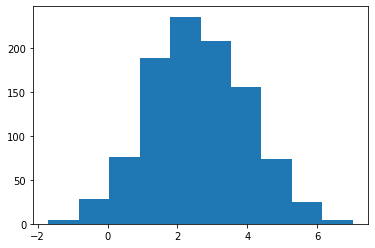

In [360]:
import statistics as st
plt.hist(quanity_lst)
print('Max Quantity = ', max(quanity_lst))
print('Min Quantity = ', min(quanity_lst))
#print('Mode Profit = ', st.mode(results))
print('Median Quantity', st.median(quanity_lst))
print('Avg Quantity = ', st.mean(quanity_lst))

Q3. with marketing efforts. Based on the analysis and some manipulation, we see that EastCoast with Product 1 has the highest
 quantity sold at 4357, and this is 27% of th total quantity by region and product type. So, we will focus on this specific 
 region as this is our highest customer base and lot of people also spend the time to browse the website. So, it makes 
sense to market to this segment and expect a 20% increease. 


In [ ]:
 proportion = full_df[['Region', 'Quantity', 'Product Type','Time (minutes)']].groupby(['Region', 'Product Type']).sum()
proportion = proportion.reset_index()
proportion['Quantity_percentage'] = proportion['Quantity']/ proportion['Quantity'].sum()
proportion['Time (minutes)_percentage'] = proportion['Time (minutes)']/ proportion['Time (minutes)'].sum()
proportion

,Region,Product Type,Quantity,Time (minutes),Quantity_percentage,Time (minutes)_percentage
0,EastCoast,1,4357,83330.972034,0.270621,0.270008
1,EastCoast,2,952,18024.689586,0.059130,0.058403
2,EastCoast,3,849,16629.909488,0.052733,0.053884
3,EastCoast,4,886,16923.578039,0.055031,0.054836
4,EastCoast,5,873,16835.890683,0.054224,0.054551
5,Midwest,1,222,3942.579629,0.013789,0.012775
6,Midwest,2,139,2515.961623,0.008634,0.008152
7,Midwest,3,2273,44518.167824,0.141180,0.144247
8,Midwest,4,332,6190.285963,0.020621,0.020058
9,Midwest,5,284,5688.354176,0.017640,0.018431


In [ ]:
east = full_df.loc[full_df['Region'] == 'EastCoast']
east

,Month,Region,Time (minutes),Product Type,Quantity,Product_type,Revenue,Capacity
0,1,EastCoast,44.975953,1,1,1,10,6000
3,1,EastCoast,42.824992,3,2,3,15,4500
4,1,EastCoast,56.760768,1,2,1,10,6000
7,1,EastCoast,45.589773,3,1,3,15,4500
8,1,EastCoast,44.088041,1,3,1,10,6000
...,...,...,...,...,...,...,...,...
6163,6,EastCoast,42.303595,2,1,2,12,2200
6164,6,EastCoast,53.557753,1,1,1,10,6000
6165,6,EastCoast,33.168065,1,1,1,10,6000
6169,6,EastCoast,45.969820,1,1,1,10,6000


In [ ]:
east_grouped = east[['Product Type','Quantity','Time (minutes)']].groupby(['Product Type']).sum()
east_grouped['Quantity_percentage'] = east_grouped['Quantity']/ east_grouped['Quantity'].sum()
east_grouped['Time (minutes)_percentage'] = east_grouped['Time (minutes)']/ east_grouped['Time (minutes)'].sum()
east_grouped

,Quantity,Time (minutes),Quantity_percentage,Time (minutes)_percentage
Product Type,,,,
1,4357,83330.972034,0.550335,0.549151
2,952,18024.689586,0.120248,0.118783
3,849,16629.909488,0.107238,0.109591
4,886,16923.578039,0.111911,0.111526
5,873,16835.890683,0.110269,0.110949


In [ ]:
weighted_product = random.choices([1,2,3,4,5] , [55.0335, 12.0248, 10.7238, 11.1911, 11.0269])
weighted_product = print(*weighted_product)

1


In [381]:
#proportion[proportion['Region']=='EastCoast'].mean()
print(east[east['Region']=='EastCoast'].describe())

             Month  Time (minutes)     Quantity    qty_array
count  3049.000000     3049.000000  3049.000000  3049.000000
mean      3.613316       49.768790     2.596589     2.607740
std       1.697526        9.928303     1.367245     1.688753
min       1.000000       16.624108     1.000000    -2.233197
25%       2.000000       43.005604     2.000000     1.426169
50%       4.000000       49.618364     2.000000     2.477132
75%       5.000000       56.504273     3.000000     3.626547
max       6.000000       80.190180     6.000000     8.131246


## Approach one 
We used a weighted product type system to make sure that the product types were given the expected probability. We found on previous analysis above that Eastbound with Product type 1 is the most common, so these factors must be correctly associated in the simulation. 

In [376]:
import random
def runSimulation1(num_trials, weighted_probability_num = random.choices([1,2,3,4,5] , [55.0335, 12.0248, 10.7238, 11.1911, 11.0269])):
  finalqty = list();
  for row in range(0, num_trials):
    if (num_trials < 0):
      quantity = 1
    else:
      time_browsed = np.random.normal(east['Time (minutes)'])   
      typeofproducts = np.random.uniform(1,6)
      quantity = np.random.normal(east['Quantity'])*weighted_probability_num
      east['qty_array'] = np.random.normal(east['Quantity'])*weighted_probability_num
      finalqty.append(quantity)
  return east['qty_array']

In [379]:
## The resulting final quantity array will be added to the East dataframe with the name of qty_array. 
first_approach_results = runSimulation1(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Max Quantity =  8.13124620811477
Max Quantity =  -2.2331965515475627
Median Quantity =  2.477131944250485
Avg Quantity =  2.607739992728091


Text(0.5, 1.0, 'Histogram of Quantity from the simulation')

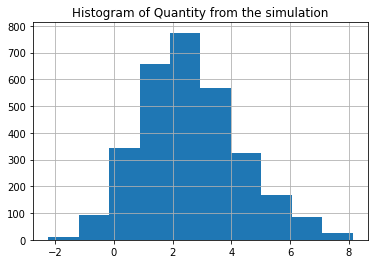

In [380]:
print('Max Quantity = ', max(east['qty_array']))
print('Max Quantity = ', min(east['qty_array']))
#print('Mode Profit = ', st.mode(results))
print('Median Quantity = ', st.median(east['qty_array']))
print('Avg Quantity = ', st.mean(east['qty_array']))
east['qty_array'].hist()
plt.title('Histogram of Quantity from the simulation')

In [384]:
print(east.describe())

             Month  Time (minutes)     Quantity    qty_array
count  3049.000000     3049.000000  3049.000000  3049.000000
mean      3.613316       49.768790     2.596589     2.607740
std       1.697526        9.928303     1.367245     1.688753
min       1.000000       16.624108     1.000000    -2.233197
25%       2.000000       43.005604     2.000000     1.426169
50%       4.000000       49.618364     2.000000     2.477132
75%       5.000000       56.504273     3.000000     3.626547
max       6.000000       80.190180     6.000000     8.131246


## Method 2 
Define a function with the given parameters. 

In [370]:
EastCoast_mean = 2.5965
EastCoast_std = 1.367245
import random
def runSimulation2(num_trials, weighted_probability_num = random.choices([1,2,3,4,5] , [55.0335, 12.0248, 10.7238, 11.1911, 11.0269])):
  finalqty = list();
  for row in range(0, num_trials):
    if (num_trials < 0):
      quantity = 1
    else:
      time_browsed = np.random.normal(east['Time (minutes)'])   
      typeofproducts = np.random.uniform(1,6)
      quantity = rd.normalvariate(EastCoast_mean,EastCoast_std)*weighted_probability_num*1.20
      finalqty.append(quantity)
  return finalqty


In [371]:
### Run this first and put the output of this to the second input on the RunSimulation function below. 
weighted_product = random.choices([1,2,3,4,5] , [55.0335, 12.0248, 10.7238, 11.1911, 11.0269])
weighted_product

[1]

In [372]:
results = runSimulation2(1000,4)

Max Quantity =  36.73024124955615
Min Quantity =  -7.745832495380633
Median Quantity =  12.38388453568049
Avg Quantity =  12.384377204367569


(array([ 10.,  25., 111., 209., 269., 228., 110.,  30.,   7.,   1.]),
 array([-7.7458325 , -3.29822512,  1.14938225,  5.59698963, 10.044597  ,
        14.49220438, 18.93981175, 23.38741913, 27.8350265 , 32.28263388,
        36.73024125]),
 <a list of 10 Patch objects>)

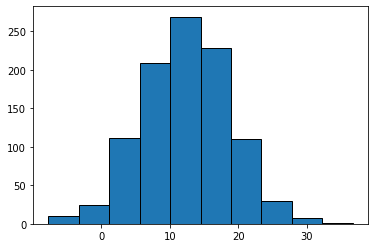

In [373]:
print('Max Quantity = ', max(results))
print('Min Quantity = ', min(results))
#print('Mode Profit = ', st.mode(results))
print('Median Quantity = ', st.median(results))
print('Avg Quantity = ', st.mean(results))
plt.hist(results,  edgecolor='k')